# Analysis for the Electricity Company for the maintenance of lighting in stations


- The goal of this analysis is to give the electric company more information about the best time to perform lighting maintenance on New York City subway stations using MTA Turnstile data.

- And the best time will be determined at the MTA stations for the electricity company to work to maintain the lighting and to perform their work in the best way and in non-peak times.


- First, I will do cleaning and importing data from http://web.mta.info/developers/turnstile.html

# Data Sourcing and Cleaning

In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
pwd

'C:\\Users\\user\\gitfolder\\NBM_EDA_Gamma'

In [6]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210710 ,210717 ,210724 ,210731 ,210807 ,210814 ,210821 ,210828 ,210904,210911,210918,210925 ]


In [7]:
engine = create_engine("sqlite:///mtadata.db")

In [8]:
pwd

'C:\\Users\\user\\gitfolder\\NBM_EDA_Gamma'

In [9]:
turnstiles_df = get_data(week_nums)
turnstiles_df.to_csv('data.csv',index = False)

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,00:00:00,REGULAR,7596401,2597187
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,REGULAR,7596412,2597189
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,REGULAR,7596422,2597208
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,REGULAR,7596466,2597262
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,REGULAR,7596572,2597289


In [11]:
#columns names
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [12]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
#data information
print(turnstiles_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514588 entries, 0 to 210399
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 230.2+ MB
None


In [14]:
turnstiles_df.STATION.value_counts().sort_index()

1 AV               12396
103 ST              7568
103 ST-CORONA       4533
104 ST              4540
110 ST              3021
                   ...  
WOODLAWN            2517
WORLD TRADE CTR     9050
WTC-CORTLANDT      17629
YORK ST             1524
ZEREGA AV           3024
Name: STATION, Length: 379, dtype: int64

In [15]:
turnstiles_df['C/A'].value_counts().sort_index()

A002     6050
A006     4048
A007     3029
A010     4021
A011     6048
         ... 
S101     6521
S101A    6045
S102     3450
TRAM1    1992
TRAM2    3061
Name: C/A, Length: 751, dtype: int64

In [16]:
turnstiles_df.UNIT.value_counts().sort_index()

R001    17684
R003     1509
R004     2519
R005     2044
R006     3368
        ...  
R551     8948
R552    12219
R570     8588
R571     7566
R572     8056
Name: UNIT, Length: 469, dtype: int64

In [17]:
#data describe
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.514588e+06,2.514588e+06
mean,4.141971e+07,3.315016e+07
std,2.179176e+08,1.915639e+08
min,0.000000e+00,0.000000e+00
25%,2.199450e+05,1.031560e+05
50%,1.395646e+06,8.517270e+05
75%,5.996020e+06,3.971873e+06
max,2.147405e+09,2.133797e+09


In [18]:
#null values
turnstiles_df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [20]:
#create datetime column 
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [21]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,00:00:00,REGULAR,7596401,2597187,2021-07-03 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,REGULAR,7596412,2597189,2021-07-03 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,REGULAR,7596422,2597208,2021-07-03 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,REGULAR,7596466,2597262,2021-07-03 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,REGULAR,7596572,2597289,2021-07-03 16:00:00


In [22]:
#create day column 
turnstiles_df['DAY'] = turnstiles_df[['DATE_TIME']]\
.apply(lambda x:datetime.datetime.strftime(x['DATE_TIME'], '%A'), axis=1)

In [23]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,00:00:00,REGULAR,7596401,2597187,2021-07-03 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,REGULAR,7596412,2597189,2021-07-03 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,REGULAR,7596422,2597208,2021-07-03 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,REGULAR,7596466,2597262,2021-07-03 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,REGULAR,7596572,2597289,2021-07-03 16:00:00,Saturday


In [24]:
#drop duplicates value

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,00:00:00,REGULAR,7596401,2597187,2021-07-03 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,04:00:00,REGULAR,7596412,2597189,2021-07-03 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,08:00:00,REGULAR,7596422,2597208,2021-07-03 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,12:00:00,REGULAR,7596466,2597262,2021-07-03 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/03/2021,16:00:00,REGULAR,7596572,2597289,2021-07-03 16:00:00,Saturday


In [25]:
#delete the unnecessary columns
turnstiles_df= turnstiles_df.drop(['LINENAME','DIVISION','DESC'] , axis = 1 , errors='ignore')
turnstiles_df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,2597187,2021-07-03 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2597189,2021-07-03 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2597208,2021-07-03 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2597262,2021-07-03 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2597289,2021-07-03 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,Friday
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,Friday
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,Friday
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,Friday


In [26]:
#view sample data
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "07/03/2021")]

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY
1434,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,00:00:00,496357,1656540,2021-07-03 00:00:00,Saturday
1435,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,04:00:00,496362,1656559,2021-07-03 04:00:00,Saturday
1436,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,08:00:00,496363,1656596,2021-07-03 08:00:00,Saturday
1437,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,12:00:00,496384,1656743,2021-07-03 12:00:00,Saturday
1438,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,16:00:00,496417,1656985,2021-07-03 16:00:00,Saturday
1439,A011,R080,01-00-00,57 ST-7 AV,07/03/2021,20:00:00,496454,1657190,2021-07-03 20:00:00,Saturday


In [27]:
#group by column "STATION", "UNIT","C/A" and "SCP"
turnstiles_df.groupby(["STATION", "UNIT","C/A","SCP"])
turnstiles_df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,2597187,2021-07-03 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2597189,2021-07-03 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2597208,2021-07-03 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2597262,2021-07-03 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2597289,2021-07-03 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,Friday
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,Friday
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,Friday
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,Friday


In [29]:
#create column TIME_INTERVAL
turnstiles_df["TIME_INTERVAL"] = (
    np.where( (turnstiles_df.DATE_TIME.dt.hour <= 4), "0:00 to 4:00"
         ,np.where(
             (turnstiles_df.DATE_TIME.dt.hour <= 8), "4:00 to 8:00"
             ,np.where(
                 (turnstiles_df.DATE_TIME.dt.hour <= 12), "8:00 to 12:00"
                 ,np.where(
                     (turnstiles_df.DATE_TIME.dt.hour <= 16), "12:00 to 16:00"
                     ,np.where(
                         (turnstiles_df.DATE_TIME.dt.hour <= 20), "16:00 to 20:00"
                         ,"20:00 to 24:00"))))))

In [30]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,07/03/2021,00:00:00,7596401,2597187,2021-07-03 00:00:00,Saturday,0:00 to 4:00
1,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2597189,2021-07-03 04:00:00,Saturday,0:00 to 4:00
2,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2597208,2021-07-03 08:00:00,Saturday,4:00 to 8:00
3,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2597262,2021-07-03 12:00:00,Saturday,8:00 to 12:00
4,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2597289,2021-07-03 16:00:00,Saturday,12:00 to 16:00


In [31]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
turnstiles_hours = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

turnstiles_hours.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,7596401
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,7596412
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,7596422
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,7596466
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,7596572


In [32]:
turnstiles_hours[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (turnstiles_hours
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles_hours.head()

<ipython-input-32-96150063f8b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_hours[["PREV_DATE_TIME", "PREV_ENTRIES"]] = (turnstiles_hours


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE_TIME,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,7596401,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,7596412,2021-07-03 00:00:00,7596401.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,7596422,2021-07-03 04:00:00,7596412.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,7596466,2021-07-03 08:00:00,7596422.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,7596572,2021-07-03 12:00:00,7596466.0


In [33]:
turnstiles_hours.tail()# PRINT LAST DATA FREAME

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE_TIME,PREV_ENTRIES
2514461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,2021-09-24 01:00:00,5554.0
2514462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,2021-09-24 05:00:00,5554.0
2514463,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,2021-09-24 09:00:00,5554.0
2514464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,2021-09-24 13:00:00,5554.0
2514465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,5554,2021-09-24 17:00:00,5554.0


In [34]:
turnstiles_hours.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)
turnstiles_hours

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE_TIME,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,7596412,2021-07-03 00:00:00,7596401.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,7596422,2021-07-03 04:00:00,7596412.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,7596466,2021-07-03 08:00:00,7596422.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,7596572,2021-07-03 12:00:00,7596466.0
5,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,7596715,2021-07-03 16:00:00,7596572.0
...,...,...,...,...,...,...,...,...
2514461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,2021-09-24 01:00:00,5554.0
2514462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,2021-09-24 05:00:00,5554.0
2514463,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,2021-09-24 09:00:00,5554.0
2514464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,2021-09-24 13:00:00,5554.0


In [35]:
# Let's see how many stations have this problem

(turnstiles_hours[turnstiles_hours["ENTRIES"] < turnstiles_hours["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         503
A014  R081  02-00-00  49 ST                1
A049  R088  02-05-00  CORTLANDT ST        20
A066  R118  00-00-00  CANAL ST           502
A084  R125  01-03-02  BROAD ST             1
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        511
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R730  R431  00-00-04  EASTCHSTER/DYRE    445
S101  R070  00-00-02  ST. GEORGE           6
Length: 212, dtype: int64

In [36]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_hours["DAILY_ENTRIES"] = turnstiles_hours.apply(get_daily_counts, axis=1, max_counter=100000)

393216 1.0
5 150038.0
193 8049630.0
10 468616.0
167790067 702272.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
31 8724126.0
458766 2578.0
6 106396.0
164 150473.0
393216 728.0
66 3272795.0
64 124319.0
5671 4298891.0
0 117440512.0
83 367525.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
10 500619.0
327680 7577112.0
67109632 14.0
327682 67109640.0
15 67109632.0
14 1198448.0
37 305512.0
46 5405537.0
23 705357551.0
16777220 1037161.0
6 16034831.0
183 197843.0
458788 271020.0
327680 786526.0
327680 0.0
34 6214051.0
28 656520.0
37 1950780.0
173 15689534.0
290 239100.0
2718 174019.0
174023 2718.0
609994 1021.0
1195 609994.0
26911 332760.0
332770 26911.0
0 117404.0
0 182617.0
430827 73.0
5 430827.0
131640 408512.0
408706 131640.0
265384 54590.0
54602 265384.0
89 624773.0
430827 9370.0
9429 430827.0
75 226654.0
108 277883.0
4 118847.0
1 146227.0
70 319276.0
8 1255797.0
21 120061.0
5 993961.0
7 201369.0
9 380650.0
11123659 4624026.0
5 11123659.0
1891101745 1

In [37]:
turnstiles_hours.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE_TIME,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,7596412,2021-07-03 00:00:00,7596401.0,11.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,7596422,2021-07-03 04:00:00,7596412.0,10.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,7596466,2021-07-03 08:00:00,7596422.0,44.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,7596572,2021-07-03 12:00:00,7596466.0,106.0
5,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,7596715,2021-07-03 16:00:00,7596572.0,143.0


In [38]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
turnstiles_hours1 = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .EXITS.first())

turnstiles_hours1.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,2597187
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,2597189
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,2597208
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,2597262
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,2597289


In [39]:
turnstiles_hours1[["PREV_DATE_TIME", "PREV_EXITS"]] = (turnstiles_hours1
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles_hours1.head()

<ipython-input-39-4e5b26529250>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_hours1[["PREV_DATE_TIME", "PREV_EXITS"]] = (turnstiles_hours1


,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS,PREV_DATE_TIME,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,2597187,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,2597189,2021-07-03 00:00:00,2597187.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,2597208,2021-07-03 04:00:00,2597189.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,2597262,2021-07-03 08:00:00,2597208.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,2597289,2021-07-03 12:00:00,2597262.0


In [40]:
turnstiles_hours1.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)
turnstiles_hours1

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS,PREV_DATE_TIME,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,2597189,2021-07-03 00:00:00,2597187.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,2597208,2021-07-03 04:00:00,2597189.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,2597262,2021-07-03 08:00:00,2597208.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,2597289,2021-07-03 12:00:00,2597262.0
5,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,2597312,2021-07-03 16:00:00,2597289.0
...,...,...,...,...,...,...,...,...
2514461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,645,2021-09-24 01:00:00,645.0
2514462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,645,2021-09-24 05:00:00,645.0
2514463,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,645,2021-09-24 09:00:00,645.0
2514464,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,646,2021-09-24 13:00:00,645.0


In [41]:
# Let's see how many stations have this problem

(turnstiles_hours1[turnstiles_hours1["EXITS"] < turnstiles_hours1["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         503
A014  R081  02-00-00  49 ST                1
A082  R028  05-05-01  FULTON ST            1
A084  R125  01-03-02  BROAD ST             1
B012  R196  00-00-00  PROSPECT PARK      503
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        507
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R728  R226  00-05-01  GUN HILL RD          1
S101  R070  00-00-02  ST. GEORGE           6
Length: 197, dtype: int64

In [42]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_hours1["DAILY_EXITS"] = turnstiles_hours1.apply(get_daily_counts, axis=1, max_counter=100000)

63 2357391.0
124 689992.0
268473354 1083236.0
187 2246287.0
1 1076720.0
100678103 413088.0
36 8512839.0
7 1025567.0
50 205674.0
12 274285.0
146 2544401.0
23 161084.0
164 152516.0
3844 494213.0
306 1152627.0
14484466 852978.0
852978 14484466.0
15894763 166123.0
166125 15894763.0
2133796536 55614.0
55627 2133796536.0
2 477315.0
0 2004698.0
7 1502424.0
50 1852012.0
4 705468481.0
1057292926 347736.0
347800 1057292926.0
13 416028.0
25 7304094.0
110 255803.0
36 767349.0
33 2136659.0
1179 3095180.0
208 8944327.0
115331 5260.0
5260 115331.0
72 836225.0
25881 146879.0
146892 25881.0
0 205881.0
287540 4132.0
4835 287540.0
287893 3421.0
3631 287893.0
201772 2169.0
161 201772.0
23722 143915.0
143929 23722.0
500607 0.0
0 500607.0
186 116059.0
60 448959.0
0 427375.0
55 172646.0
18 167956.0
365000 31961.0
31961 365000.0
20 202479.0
245 234976.0
36 238675.0
12 191692.0
14 346560.0
1 132642.0
21 154540.0
4 217833.0
24 287731.0
0 287226.0
4 423183.0
258 200900.0
0 2974479.0
14324221 1392264.0
5 14324225

In [43]:
turnstiles_hours1.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS,PREV_DATE_TIME,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,2597189,2021-07-03 00:00:00,2597187.0,2.0
2,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,2597208,2021-07-03 04:00:00,2597189.0,19.0
3,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,2597262,2021-07-03 08:00:00,2597208.0,54.0
4,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,2597289,2021-07-03 12:00:00,2597262.0,27.0
5,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,2597312,2021-07-03 16:00:00,2597289.0,23.0


In [44]:
#merge data frame entries and data frame exits
turnstiles_in_hours = pd.merge(turnstiles_hours,turnstiles_hours1,
                              on=("C/A", "UNIT", "SCP", "STATION","DATE_TIME"))

In [45]:
turnstiles_in_hours.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,PREV_DATE_TIME_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATE_TIME_y,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,7596412,2021-07-03 00:00:00,7596401.0,11.0,2597189,2021-07-03 00:00:00,2597187.0,2.0
1,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,7596422,2021-07-03 04:00:00,7596412.0,10.0,2597208,2021-07-03 04:00:00,2597189.0,19.0
2,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,7596466,2021-07-03 08:00:00,7596422.0,44.0,2597262,2021-07-03 08:00:00,2597208.0,54.0
3,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,7596572,2021-07-03 12:00:00,7596466.0,106.0,2597289,2021-07-03 12:00:00,2597262.0,27.0
4,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,7596715,2021-07-03 16:00:00,7596572.0,143.0,2597312,2021-07-03 16:00:00,2597289.0,23.0


In [46]:
#drop multiple columns by name
turnstiles_in_hours.drop(['ENTRIES','PREV_DATE_TIME_x',
                      'PREV_ENTRIES','EXITS','PREV_DATE_TIME_y','PREV_EXITS'], axis=1, inplace=True)
turnstiles_in_hours.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,11.0,2.0
1,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,10.0,19.0
2,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,44.0,54.0
3,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,106.0,27.0
4,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,143.0,23.0


In [47]:
#calculate the traffic
turnstiles_in_hours['TRAFFIC'] = (turnstiles_in_hours['DAILY_ENTRIES'] + turnstiles_in_hours['DAILY_EXITS'])
turnstiles_in_hours

,C/A,UNIT,SCP,STATION,DATE_TIME,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-07-03 04:00:00,11.0,2.0,13.0
1,A002,R051,02-00-00,59 ST,2021-07-03 08:00:00,10.0,19.0,29.0
2,A002,R051,02-00-00,59 ST,2021-07-03 12:00:00,44.0,54.0,98.0
3,A002,R051,02-00-00,59 ST,2021-07-03 16:00:00,106.0,27.0,133.0
4,A002,R051,02-00-00,59 ST,2021-07-03 20:00:00,143.0,23.0,166.0
...,...,...,...,...,...,...,...,...
2509436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0,0.0,0.0
2509437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0,0.0,0.0
2509438,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0,0.0,0.0
2509439,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0


# polt the traffic at the station

In [49]:
#calculate the traffic at each station descending
station_totals = turnstiles_in_hours.groupby('STATION').sum()\
    .sort_values('TRAFFIC', ascending=False)\
    .reset_index()

station_totals

,STATION,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,34 ST-PENN STA,3823522.0,5087330.0,8910852.0
1,34 ST-HERALD SQ,2861965.0,3866420.0,6728385.0
2,GRD CNTRL-42 ST,2678312.0,3922465.0,6600777.0
3,86 ST,2432335.0,3391286.0,5823621.0
4,14 ST-UNION SQ,2357005.0,3456594.0,5813599.0
...,...,...,...,...
374,BEACH 98 ST,19190.0,29362.0,48552.0
375,BEACH 105 ST,12276.0,20304.0,32580.0
376,TOMPKINSVILLE,25031.0,2.0,25033.0
377,BROAD CHANNEL,9707.0,5796.0,15503.0


In [48]:
turnstiles_in_hours.tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
2509436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0,0.0,0.0
2509437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0,0.0,0.0
2509438,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0,0.0,0.0
2509439,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0
2509440,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,0.0,0.0,0.0


Text(0.5, 1.0, 'Station Totals')

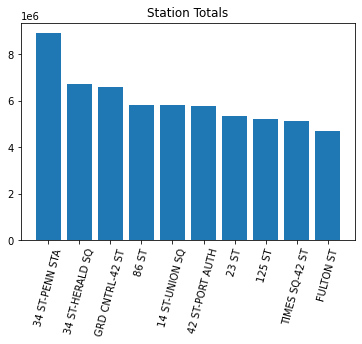

In [51]:
#plot the traffic
plt.bar(x=station_totals['STATION'][:10], height=station_totals['TRAFFIC'][:10])
plt.xticks(rotation=75)
plt.title('Station Totals')

In [52]:
#calculate the traffic at each station ascending
station_totals = turnstiles_in_hours.groupby('STATION').sum()\
    .sort_values('TRAFFIC', ascending=True)\
    .reset_index()

station_totals

,STATION,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,ORCHARD BEACH,447.0,357.0,804.0
1,BROAD CHANNEL,9707.0,5796.0,15503.0
2,TOMPKINSVILLE,25031.0,2.0,25033.0
3,BEACH 105 ST,12276.0,20304.0,32580.0
4,BEACH 98 ST,19190.0,29362.0,48552.0
...,...,...,...,...
374,14 ST-UNION SQ,2357005.0,3456594.0,5813599.0
375,86 ST,2432335.0,3391286.0,5823621.0
376,GRD CNTRL-42 ST,2678312.0,3922465.0,6600777.0
377,34 ST-HERALD SQ,2861965.0,3866420.0,6728385.0


Text(0.5, 1.0, 'Station Totals')

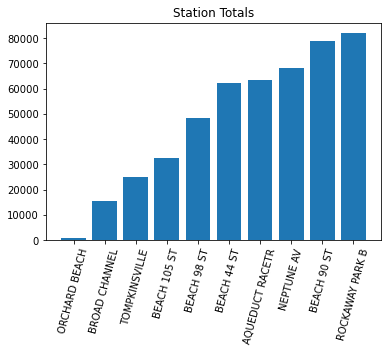

In [53]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['TRAFFIC'][:10])
plt.xticks(rotation=75)
plt.title('Station Totals')

In [129]:
station_in_hours = pd.merge(turnstiles_df,turnstiles_in_hours,
                              on=("C/A", "UNIT", "SCP", "STATION","DATE_TIME"))

In [130]:
station_in_hours.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY,TIME_INTERVAL,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,7596412,2597189,2021-07-03 04:00:00,Saturday,0:00 to 4:00,11.0,2.0,13.0
1,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,7596422,2597208,2021-07-03 08:00:00,Saturday,4:00 to 8:00,10.0,19.0,29.0
2,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,7596466,2597262,2021-07-03 12:00:00,Saturday,8:00 to 12:00,44.0,54.0,98.0
3,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,7596572,2597289,2021-07-03 16:00:00,Saturday,12:00 to 16:00,106.0,27.0,133.0
4,A002,R051,02-00-00,59 ST,07/03/2021,20:00:00,7596715,2597312,2021-07-03 20:00:00,Saturday,16:00 to 20:00,143.0,23.0,166.0


In [131]:
#drop multiple columns by name
station_in_hours.drop(['ENTRIES','EXITS','DAILY_ENTRIES',
                      'DAILY_EXITS'], axis=1, inplace=True)
station_in_hours.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,DAY,TIME_INTERVAL,TRAFFIC
0,A002,R051,02-00-00,59 ST,07/03/2021,04:00:00,2021-07-03 04:00:00,Saturday,0:00 to 4:00,13.0
1,A002,R051,02-00-00,59 ST,07/03/2021,08:00:00,2021-07-03 08:00:00,Saturday,4:00 to 8:00,29.0
2,A002,R051,02-00-00,59 ST,07/03/2021,12:00:00,2021-07-03 12:00:00,Saturday,8:00 to 12:00,98.0
3,A002,R051,02-00-00,59 ST,07/03/2021,16:00:00,2021-07-03 16:00:00,Saturday,12:00 to 16:00,133.0
4,A002,R051,02-00-00,59 ST,07/03/2021,20:00:00,2021-07-03 20:00:00,Saturday,16:00 to 20:00,166.0


# plotting and calculating peak times for some stations

## - 34 ST-PENN STA station

In [156]:
station1 = station_in_hours[station_in_hours['STATION'] == '34 ST-PENN STA']

In [157]:
station1 = station1.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

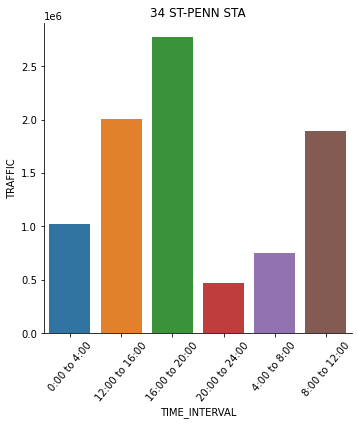

In [158]:
sns.catplot(x=station1['TIME_INTERVAL'],y=station1['TRAFFIC'], kind="bar",  data=station1)
plt.xticks(rotation=50)
plt.title('34 ST-PENN STA');

## - GRD CNTRL-42 ST	 station

In [153]:
station2 = station_in_hours[station_in_hours['STATION'] == 'GRD CNTRL-42 ST']

In [154]:
station2 = station2.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

Text(0.5, 1.0, 'GRD CNTRL-42 ST')

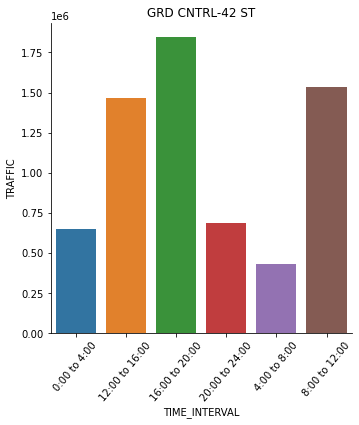

In [155]:
sns.catplot(x=station2['TIME_INTERVAL'],y=station2['TRAFFIC'], kind="bar",  data=station2)
plt.xticks(rotation=50)
plt.title('GRD CNTRL-42 ST')

## - ZEREGA AV station

In [138]:
#step 1
station3 = station_in_hours[station_in_hours['STATION'] == 'ZEREGA AV']

In [139]:
#step 2
station3 = station3.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

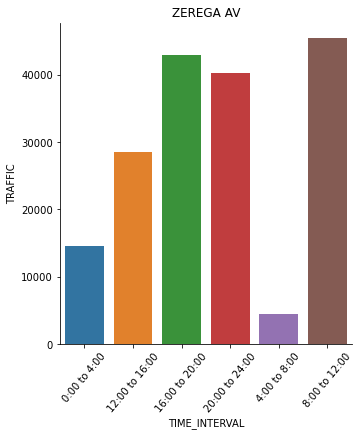

In [140]:
#step 3
sns.catplot(x=station3['TIME_INTERVAL'],y=station3['TRAFFIC'], kind="bar",  data=station3)
plt.xticks(rotation=50)
plt.title('ZEREGA AV');

## -  86 ST station

In [150]:
#step 1
station4 = station_in_hours[station_in_hours['STATION'] == '86 ST']

In [151]:
#step 2
station4 = station4.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

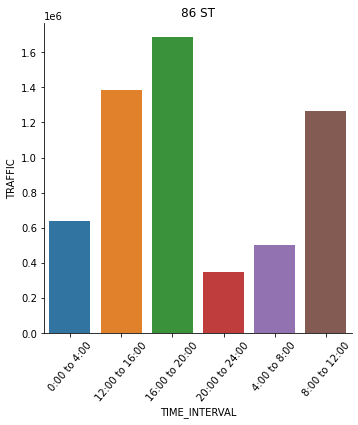

In [152]:
#step 3
sns.catplot(x=station4['TIME_INTERVAL'],y=station4['TRAFFIC'], kind="bar",  data=station4)
plt.xticks(rotation=50)
plt.title('86 ST');

## - BROAD CHANNEL station

In [144]:
#step 1
station5 = station_in_hours[station_in_hours['STATION'] == 'BROAD CHANNEL']

In [145]:
#step 2
station5 = station5.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

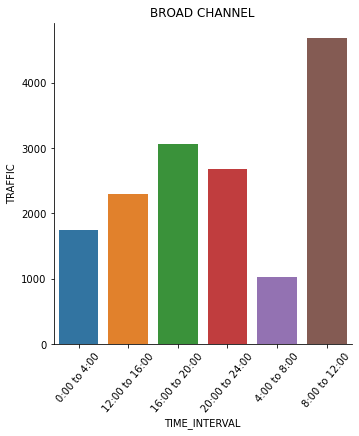

In [146]:
#step 3
sns.catplot(x=station5['TIME_INTERVAL'],y=station5['TRAFFIC'], kind="bar",  data=station5)
plt.xticks(rotation=50)
plt.title('BROAD CHANNEL');

## - ORCHARD BEACH station

In [159]:
#step 1
station6 = station_in_hours[station_in_hours['STATION'] == 'ORCHARD BEACH']

In [160]:
#step 2
station6 = station6.groupby('TIME_INTERVAL').sum()\
.reset_index()\
.sort_values('TIME_INTERVAL', ascending=True)

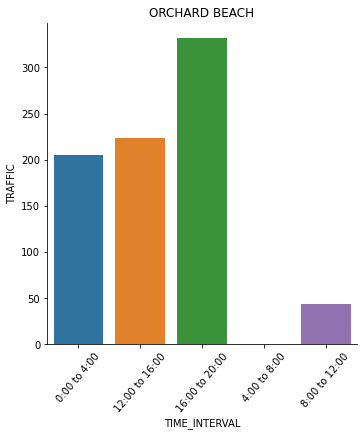

In [161]:
#step 3
sns.catplot(x=station6['TIME_INTERVAL'],y=station6['TRAFFIC'], kind="bar",  data=station6)
plt.xticks(rotation=50)
plt.title('ORCHARD BEACH');